In [2]:

import numpy as np 
import pandas as pd 
import math
import glob
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/My Drive/edc/")

In [5]:
!ls

 Consignes_Challenge_DATA.pdf   df_comb.csv	     engagement_data
'Copy of districts_info.csv'    districts_info.csv   products_info.csv


**Loading Educational Product Data**

In [6]:
products_df = pd.read_csv("products_info.csv")
products_df.head() ## looking at portion of th data

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [36]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
 6   Essential_Function_main     352 non-null    object
 7   Essential_Function_sub      352 non-null    object
dtypes: int64(1), object(7)
memory usage: 23.4+ KB


In [37]:
products_df.describe()  ### statistical description of the dataset.

,LP ID
count,372.000000
mean,54565.795699
std,26247.551437
min,10533.000000
25%,30451.000000
50%,53942.500000
75%,77497.000000
max,99916.000000


**Loading District_info dataset**

In [7]:
districts_df= pd.read_csv("districts_info.csv")
districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 230
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district_id         88 non-null     int64  
 1   state               88 non-null     object 
 2   locale              88 non-null     object 
 3   pct_black/hispanic  88 non-null     float64
 4   pct_free/reduced    88 non-null     float64
 5   pp_total_raw        88 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 6.9+ KB


In [39]:
districts_df.describe()

,district_id,pct_black/hispanic,pct_free/reduced,pp_total_raw
count,88.000000,88.000000,88.000000,88.000000
mean,5148.204545,0.231818,0.379545,11204.545455
std,2629.120041,0.214179,0.211268,4180.301620
min,1052.000000,0.100000,0.100000,5000.000000
25%,2934.500000,0.100000,0.300000,9000.000000
50%,4791.500000,0.100000,0.300000,11000.000000
75%,7559.250000,0.300000,0.500000,13000.000000
max,9899.000000,0.900000,0.900000,33000.000000


**Loading all the engagement files and also concatenating them to make one file with an extra coulmn pertaining District_id**

In [8]:
import glob
path = '/content/drive/MyDrive/edc/engagement_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[6].split(".")[0]
    x = district_id[:]                                         #### making a new column of district_id for later manipulations
    df["district_id"] = x
    li.append(df)
    
engagement_df = pd.concat(li)
engagement_df= engagement_df.reset_index(drop=True)
engagement_df

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,64947.0,0.09,0.91,1039
1,2020-01-01,52758.0,0.09,1.83,1039
2,2020-01-01,25559.0,0.09,13.71,1039
3,2020-01-01,13496.0,0.09,4.57,1039
4,2020-01-01,94984.0,0.09,1.83,1039
...,...,...,...,...,...
22324185,2020-12-31,56028.0,0.02,0.20,9927
22324186,2020-12-31,14124.0,0.02,0.99,9927
22324187,2020-12-31,98001.0,0.00,NaN,9927
22324188,2020-12-31,13496.0,0.12,6.51,9927


In [40]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             float64       
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 851.6 MB


In [41]:
engagement_df.describe()

,lp_id,pct_access,engagement_index,district_id
count,2.232365e+07,2.231074e+07,1.694578e+07,2.232419e+07
mean,5.470879e+04,5.042399e-01,1.676063e+02,5.237180e+03
std,2.647069e+04,3.180568e+00,1.682223e+03,2.644058e+03
min,1.000300e+04,0.000000e+00,1.000000e-02,1.000000e+03
25%,3.085100e+04,0.000000e+00,3.700000e-01,2.956000e+03
50%,5.500700e+04,2.000000e-02,1.920000e+00,4.929000e+03
75%,7.766000e+04,9.000000e-02,1.365000e+01,7.675000e+03
max,9.999100e+04,1.000000e+02,2.130455e+05,9.927000e+03


Missing Values

We plot the missing values of all the three datasets.

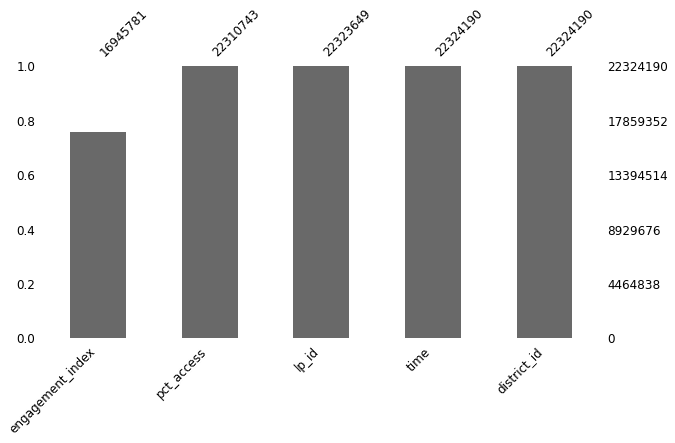

In [9]:
msno.bar(engagement_df, sort="ascending", figsize=(10,5), fontsize=12) ### missing value datasize
plt.show()

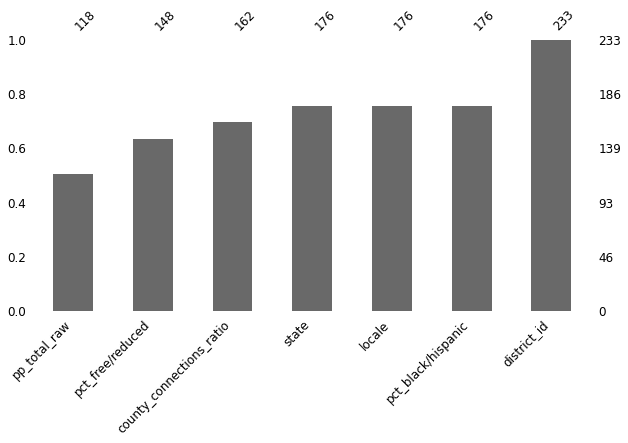

In [10]:
msno.bar(districts_df, sort="ascending", figsize=(10,5), fontsize=12) ### missing value datasize
plt.show()

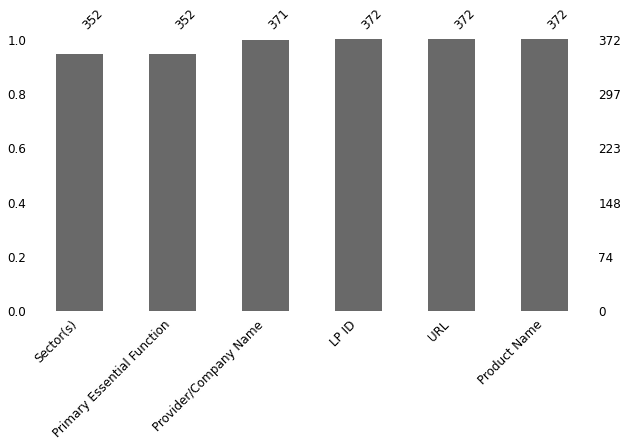

In [11]:
msno.bar(products_df, sort="ascending", figsize=(10,5), fontsize=12) ### missing value datasize
plt.show()

**DATA CLEANING**

We make the following changes to our datasets and all the changes are quite logical:
1. - Converting list of columnspct_black/hispanic and pct_free/reduced into float
2.- Converting list pp_total_raw into Integers.
3.- Droping county_connections_ratio acrross all categories.

In [12]:
districts_df.dropna(inplace = True)
for i in ['pct_black/hispanic', 'pct_free/reduced','county_connections_ratio']:
    districts_df[i] = districts_df[i].apply(lambda x: float(str(x).split(',')[0][1:])+0.1)

districts_df['pp_total_raw'] = districts_df['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)
districts_df.drop('county_connections_ratio', axis = 1, inplace = True)

districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,15000
2,4921,Utah,Suburb,0.1,0.3,7000
5,5987,Wisconsin,Suburb,0.1,0.1,11000
6,3710,Utah,Suburb,0.1,0.5,7000
7,7177,North Carolina,Suburb,0.3,0.3,9000


**Feature Visualization**

Distribution of Districts per state.

In [13]:
def plot_time_series(df,col1,col2,col3):
    max_list = df[[col1,col2]]\
        .groupby([col1])[col2].mean()\
        .sort_values(ascending=False).index[:5].tolist()

    df = df[df[col1].isin(max_list)]\
                    .reset_index(drop=True)[[col3, col1, col2]]
    df = df.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(df, facet_col=col1, facet_col_wrap=1, width=800, height=800)
    fig.update_layout(
                      title=(col1 + " , " + col2 + " , " + col3).title(),
                      title_x=0.39,
                      template="plotly_white",
                      paper_bgcolor='#f5f7f8',
                      font = {'family': 'Serif', 'size': 20}
                     )
    fig.show()

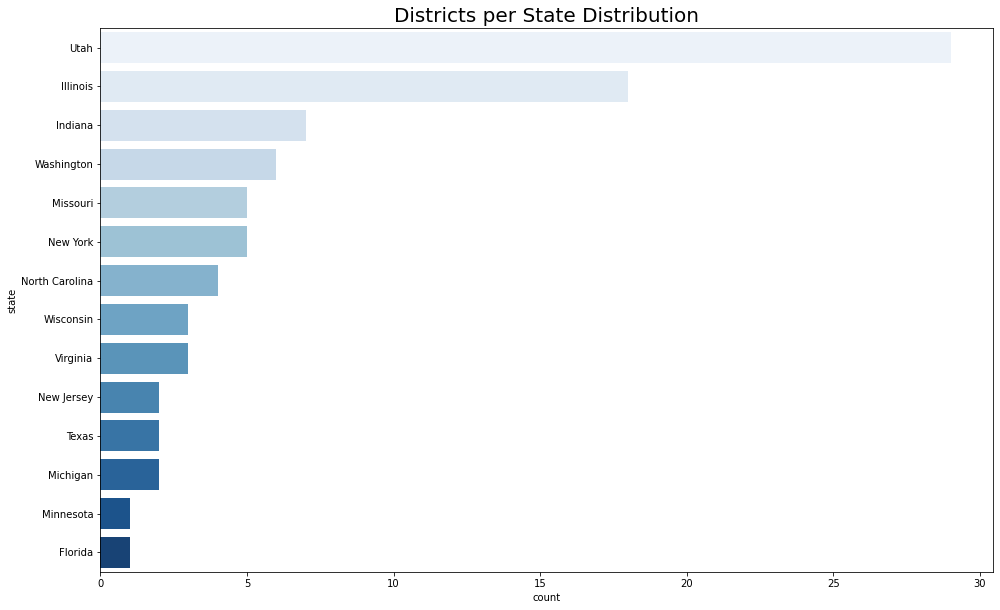

In [14]:
plt.figure(figsize=(16, 10))
sns.countplot(y="state",data=districts_df,order=districts_df.state.value_counts().index,palette="Blues",linewidth=3)
plt.title("Districts per State Distribution", size=20)
plt.show()


Now we will look at essential function subcat. distribution

In [15]:
PEF_cat_main = []
PEF_cat_sub = []
for p in products_df["Primary Essential Function"]:
    
    if (not pd.isnull(p)):
        cat1 = p.split("-",1)[0].strip()
        PEF_cat_main.append(cat1)
        
        cat2 = p.split("-",1)[1].strip()
        PEF_cat_sub.append(cat2)
    else:
        PEF_cat_main.append(np.nan)
        PEF_cat_sub.append(np.nan)
        
products_df["Essential_Function_main"] = PEF_cat_main
products_df["Essential_Function_sub"] = PEF_cat_sub

DE = (
    products_df[["Essential_Function_main", "Essential_Function_sub"]]
    .value_counts()
    .rename_axis(["Essential_Function_main", "Essential_Function_sub"])
    .reset_index(name="counts")
)

In [16]:
fig = px.histogram(
    DE,
    x = "counts",
    y = "Essential_Function_sub",
    
    title="Primary Essential Function Sub-Categories",
)
fig.update_traces(marker = dict(
            color='mediumpurple'
            )),
fig.show()

As we can see above, digital learning and content creation are leading.

Now we are done with individual dataset visualization and Analysis. We will merge the datasets now.

In [19]:
engagement_df['time'] = pd.to_datetime(engagement_df['time'])
engagement_df["district_id"] = engagement_df["district_id"].astype(str).astype(int)

In [21]:
complete_df = products_df.merge(
                                   engagement_df,
                                   left_on='LP ID', 
                                   right_on='lp_id'
                                   ).merge(
                                    districts_df,
                                    left_on='district_id',
                                    right_on='district_id'   
                                    )  # merging all datasets to make a single dataframe which we will use mostly going ahead.    


In [22]:
complete_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Essential_Function_main,Essential_Function_sub,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-13,13117.0,0.04,0.80,1052,Illinois,Suburb,0.3,0.3,17000
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-02-04,13117.0,0.04,0.40,1052,Illinois,Suburb,0.3,0.3,17000
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-02-06,13117.0,0.12,7.90,1052,Illinois,Suburb,0.3,0.3,17000
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-02-07,13117.0,0.04,1.18,1052,Illinois,Suburb,0.3,0.3,17000
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-02-10,13117.0,0.08,8.64,1052,Illinois,Suburb,0.3,0.3,17000


**Most popular educational products**

In [25]:
complete_df['Product Name'].value_counts().head(10).to_frame()

,Product Name
Google Docs,29852
Google Drive,29427
Google Sheets,29088
Google Forms,28158
Google Calendar,27850
Google Sites,27280
Google Classroom,26939
Wikipedia,26912
Chrome Web Store,26824
Netflix,26241


We see that most of the popular products are Google products with Wikipedia and Netflix completing Top 10.

Text(0.5, 1.0, 'With number of page-load per 1000 students')

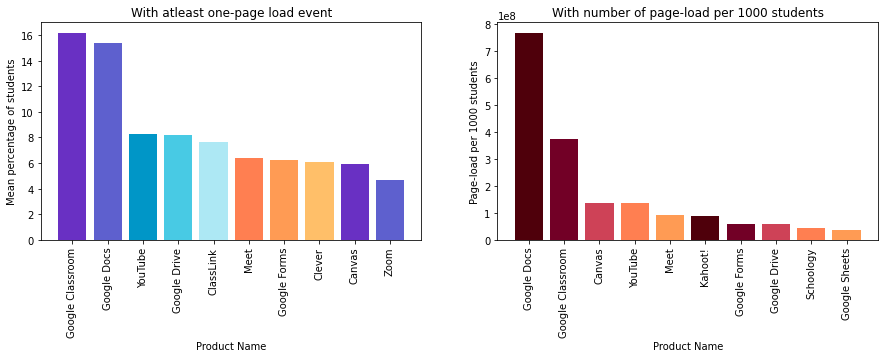

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
engagement_df.rename(columns={"lp_id": "LP ID"}, inplace=True)
merged=pd.merge(engagement_df, products_df, on= "LP ID")
m=merged.groupby("Product Name")["pct_access"].mean().sort_values(ascending=False).head(10)

engagement_df.rename(columns={"lp_id": "LP ID"}, inplace=True)
merged=pd.merge(engagement_df, products_df, on= "LP ID")
n=merged.groupby("Product Name")["engagement_index"].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.bar(m.index, m.values, color=["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Mean percentage of students')
plt.title("With atleast one-page load event")

plt.subplot(122)
plt.bar(n.index, n.values, color=["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"])
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.ylabel('Page-load per 1000 students')
plt.title("With number of page-load per 1000 students")

From the above plots, it is apparent that Google Classroom and Google Docs were the most popular products used during the pandemic. Also, it should be noted that online products like zoom became popular rapidly and thus the change was significant.

We will now turn our attention towards Demography, fee expenditure, etc.

In [49]:
def mean_state_data(df,col):      ### writing a function to show the mean distribution of features regarding demography 
    return df[[col,'state']].\
    groupby(by='state').\
    mean().\
    reset_index().\
    sort_values(by= col, ascending = False).\
    style.background_gradient(subset=[col])



In [50]:
    mean_state_data(complete_df,'pct_black/hispanic')

,state,pct_black/hispanic
9,Texas,0.660262
0,Florida,0.500000
3,Michigan,0.500000
4,Minnesota,0.500000
8,North Carolina,0.399419
12,Washington,0.365211
1,Illinois,0.318224
2,Indiana,0.240701
10,Utah,0.137782
6,New Jersey,0.100000


We observe that Texas has the highest number of Black/Hispanic population

**Incentive to Education**

In [51]:
mean_state_data(complete_df,'pct_free/reduced')

,state,pct_free/reduced
4,Minnesota,0.700000
3,Michigan,0.591493
2,Indiana,0.585556
12,Washington,0.514099
0,Florida,0.500000
9,Texas,0.500000
8,North Carolina,0.498838
11,Virginia,0.439539
7,New York,0.363762
5,Missouri,0.354510


Minnesota provides highest incentives for education

Per-child Expenditure

In [55]:
mean_state_data(complete_df,'pp_total_raw')

,state,pp_total_raw
7,New York,22303.680190
6,New Jersey,16025.174926
4,Minnesota,15000.000000
12,Washington,14007.350245
1,Illinois,13557.943471
3,Michigan,12085.066669
11,Virginia,11694.897092
13,Wisconsin,11000.000000
5,Missouri,9528.045970
8,North Carolina,9443.557370


New York spends the most on education.

**Plotting the engagement and access curve for different states and locality to have a better overview of the changes occured in the year**

In [52]:
def plot_time_series(df,col1,col2,col3):
    max_list = df[[col1,col2]]\
        .groupby([col1])[col2].mean()\
        .sort_values(ascending=False).index[:5].tolist()

    df = df[df[col1].isin(max_list)]\
                    .reset_index(drop=True)[[col3, col1, col2]]
    df = df.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(df, facet_col=col1, facet_col_wrap=1, width=800, height=800)
    fig.update_layout(
                      title=(col1 + " , " + col2 + " , " + col3).title(),
                      title_x=0.39,
                      template="plotly_white",
                      paper_bgcolor='#f5f7f8',
                      font = {'family': 'Serif', 'size': 20}
                     )
    fig.show()

In [53]:
plot_time_series(complete_df,"state","pct_access","time")
plot_time_series(complete_df,"state","engagement_index","time")
plot_time_series(complete_df,"locale","pct_access","time")
plot_time_series(complete_df,"locale","engagement_index","time")

As we can see that the engagement in rural as well as urban locality was very high in the starting months of 2020. It was followed by a little slump in the middle months but after it picked up again. The digital connectivity (measured by pct_access) followed a similar trend.

**Product access per state**

In [33]:
Race = complete_df[['state','pct_access','pct_black/hispanic']]\
.groupby('state')\
.mean()\
.dropna()\
.reset_index()\
.sort_values(by=['pct_black/hispanic','pct_access'])
Race

,state,pct_access,pct_black/hispanic
5,Missouri,0.608459,0.100000
11,Virginia,0.672463,0.100000
13,Wisconsin,1.117182,0.100000
7,New York,1.386808,0.100000
6,New Jersey,0.731896,0.100000
10,Utah,0.687761,0.137782
2,Indiana,1.137195,0.240701
1,Illinois,1.015525,0.318224
12,Washington,0.531845,0.365211
8,North Carolina,0.361143,0.399419


As we can see that there is no strong consistent relation between product access and population of black/hispanic people.

**Access to online education based on Race  **

In [56]:
Imp_neigh= complete_df[complete_df['pct_black/hispanic']<0.2][['time','pct_access','pct_black/hispanic']].groupby('time').mean().reset_index()
fig = px.line(Imp_neigh, x="time", y="pct_access")
fig.update_layout(
                     
                     )
fig.show()

In [57]:
Imp_neigh= complete_df[complete_df['pct_black/hispanic']>=0.2][['time','pct_access','pct_black/hispanic']].groupby('time').mean().reset_index()
fig = px.line(Imp_neigh, x="time", y="pct_access")
fig.update_layout(
                      title=("Black/Hispanic community access to Online Education").title(),
                     )
fig.show()

As we compare the above two plots we see that the peak for communities with a lesser population of Black/Hispanic people is higher than in the reverse case which suggests that B/H people have lesser access to educational products.

CORRELATION between different attributes

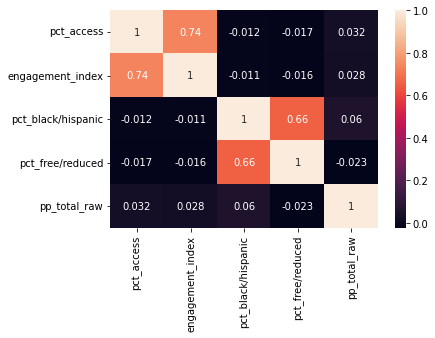

In [35]:
sns.heatmap(complete_df.drop(['LP ID','lp_id','district_id'],axis=1).corr(), annot=True);

Inferences from the above matrix:
1.- High correlation between prodcut access and engagement index;
2.- High correlation between Black/Hispanic and Free/ Reduced education implyimg that government incentives are working to make the improvised communities get better education and future.

**To Conclude**

1. - The Covid-19 pandemic resulted in boom of online education services. In particular, Digital Learning platforms and content creation services saw the highest increase. 

2. - There is a clear correlation between product access and engagement index which tells us that if the student has access to these products they might use them on daily basis.

3. - Google is the front runner in online education products as it provides a complete and secure ecosystem with a vast range of its own products.

4. - Black/Hispanic people have lesser access to educational products, but it is very marginal and can be improved readily. Also, as the data is limited, it can not be said concretely that Black/Hispanic people are being treated unfairly.

5. - There is a good amount of correlation between Black/Hispanic population and Educational incentives which suggests that government policies are working in right direction.